(512, 512, 3)


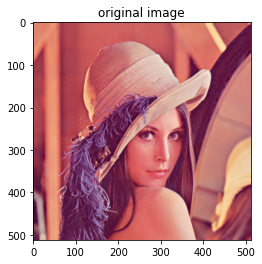

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
  
# reads image as RGB 
img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# original RGB image 
plt.title("original image")
plt.imshow(img)
print(img.shape)
# print(img)

Text(0.5, 1.0, 'grayscale')

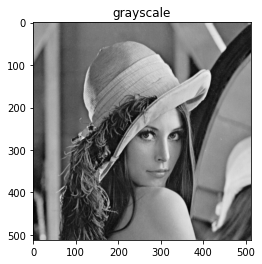

In [2]:
# f ’(x,y) =(0.299r(x,y)+0.587g(x,y)+0.114b(x,y))
gray_img = np.array([[0]*512]*512)
# print(gray_img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray_img[i][j] = img[i][j][0]*0.299 + img[i][j][1]*0.587 + img[i][j][2]*0.114
# print(gray_img)
plt.imshow(gray_img,cmap='gray')
plt.title("grayscale")
# print(gray_img)

Text(0.5, 1.0, 'B1 image')

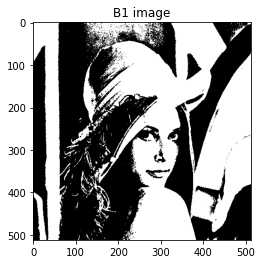

In [3]:
b1_img = np.array([[0]*512]*512)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if(gray_img[i][j]<=127):
            b1_img[i][j]=0
        else:
            b1_img[i][j]=255
plt.imshow(b1_img,cmap='gray')
plt.title("B1 image")

In [4]:
# b2_img = gray_img
b2_img = gray_img[0:512,0:512].copy()
# plt.imshow(b2_img,cmap="gray")
# print(b2_img.shape)
for i in range(b2_img.shape[0]):
    for j in range(b2_img.shape[1]):
        temp = b2_img[i][j]
        if(b2_img[i][j]<=127):
            b2_img[i][j]=0
        else:
            b2_img[i][j]=255
            
        error = temp - b2_img[i][j]
        if(i==511 and j<511):
            b2_img[i][j+1] += error
        elif(j==511 and i<511):
            b2_img[i+1][j] += error
        elif(i<511 and j<511):
            b2_img[i+1][j] += (error*3)/8
            b2_img[i+1][j+1] += (error*2)/8
            b2_img[i][j+1] += (error*3)/8

#             if b2_img[i+1][j] > 255:
#                 b2_img[i+1][j] = 255
#             elif b2_img[i+1][j] < 0:
#                 b2_img[i+1][j] = 0

#             if b2_img[i][j+1] > 255:
#                 b2_img[i][j+1] = 255
#             elif b2_img[i][j+1] < 0:
#                 b2_img[i][j+1] = 0

#             if b2_img[i+1][j+1] > 255:
#                 b2_img[i+1][j+1] = 255
#             elif b2_img[i+1][j+1] < 0:
#                 b2_img[i+1][j+1] = 0

In [5]:
diff_b1 = np.array([[0]*512]*512)
diff_b2 = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        diff_b1[i][j] = gray_img[i][i] - b1_img[i][j]
        diff_b2[i][j] = gray_img[i][i] - b2_img[i][j]

In [6]:
error_b1 = np.array([[0]*514]*514)
error_b2 = np.array([[0]*514]*514)
error_b1_mat = np.array([[0]*512]*512)
error_b2_mat = np.array([[0]*512]*512)
error_b1[1:513,1:513] = diff_b1[0:512,0:512].copy()
error_b2[1:513,1:513] = diff_b2[0:512,0:512].copy()
for i in range(1,513):
    for j in range(1,513):
        error_b1_mat[i-1][j-1] = (error_b1[i][j] + error_b1[i+1][j] + error_b1[i][j+1] + error_b1[i+1][j+1] + error_b1[i-1][j] + error_b1[i][j-1] + error_b1[i-1][j-1] + error_b1[i-1][j+1] + error_b1[i+1][j-1])/9
        error_b2_mat[i-1][j-1] = (error_b2[i][j] + error_b2[i+1][j] + error_b2[i][j+1] + error_b2[i+1][j+1] + error_b2[i-1][j] + error_b2[i][j-1] + error_b2[i-1][j-1] + error_b2[i-1][j+1] + error_b2[i+1][j-1])/9

In [7]:
cv2.imwrite("error_b1.png",error_b1)
cv2.imwrite("error_b2.png",error_b2)

True